# Exploratory Modeling Results Summary

In [1]:
# data wrangling
library(dplyr)
library(readr)
library(tidyr)
# for plotting
library(ggplot2)
library(viridis)
library(ggpubr)
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }
# read results
results <- suppressMessages(read_csv('/Users/rebeccawillison/Documents/research/wildfire/wildfires/results/IPPP_byYear_byClass.csv'))
pr.results <- suppressMessages(read_csv('/Users/rebeccawillison/Documents/research/wildfire/wildfires/results/IPPP_byMonth_Year_PRCP.csv')) 
fires <- suppressMessages(read_csv('/Users/rebeccawillison/Documents/research/wildfire/wildfires/data/ca_fires.csv', guess_max = 100000))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



## Modeling

Test H0: homogeneous intensity PPP model vs. H1: PPP intensity depends on covariate  
pValues from LRT

## Cropland Data Layer
Exists yearly for 2007-2015

In [2]:
cdl <- results %>% 
  tidyr::separate(variable, into = c('group', 'variable_name'), 
                  sep = '\\.', remove = F) %>% 
  dplyr::mutate(feature_year = ifelse(group == 'CDLFeatures',
                                      stringr::str_remove_all(variable_name, '[a-z_]'),
                                      NA),
                pValue = round(pValue, 4)) %>% 
  dplyr::filter(group == 'CDLFeatures' & year == feature_year)

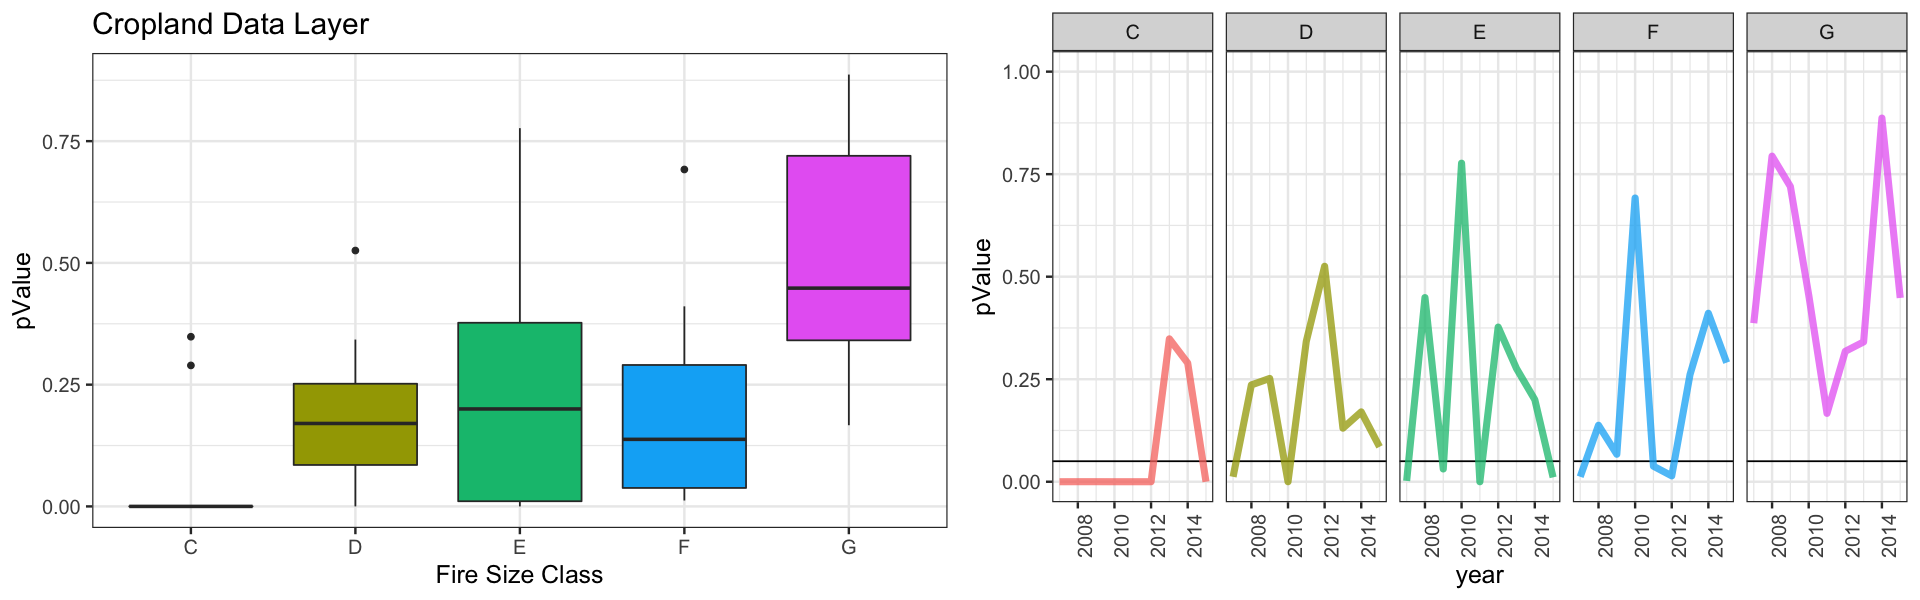

In [3]:
fig(16,5)
a <- ggplot(cdl, aes(size, pValue, fill = size)) +
  geom_boxplot() +
  theme_bw(base_size = 15) +
  guides(fill = F) +
  labs(x = 'Fire Size Class', title = 'Cropland Data Layer')
b <- ggplot(cdl, aes(year, pValue, group = size, color = size)) +
  geom_hline(yintercept = .05) +
  geom_line(alpha = .75, size = 2) +
  theme_bw(base_size = 15) +
  facet_grid(. ~ size) +
  ylim(0, 1) +
  guides(color = F) +
  theme(axis.text.x = element_text(angle = 90))
ggarrange(a, b)

## Population Density
Every five years from 2000-2020

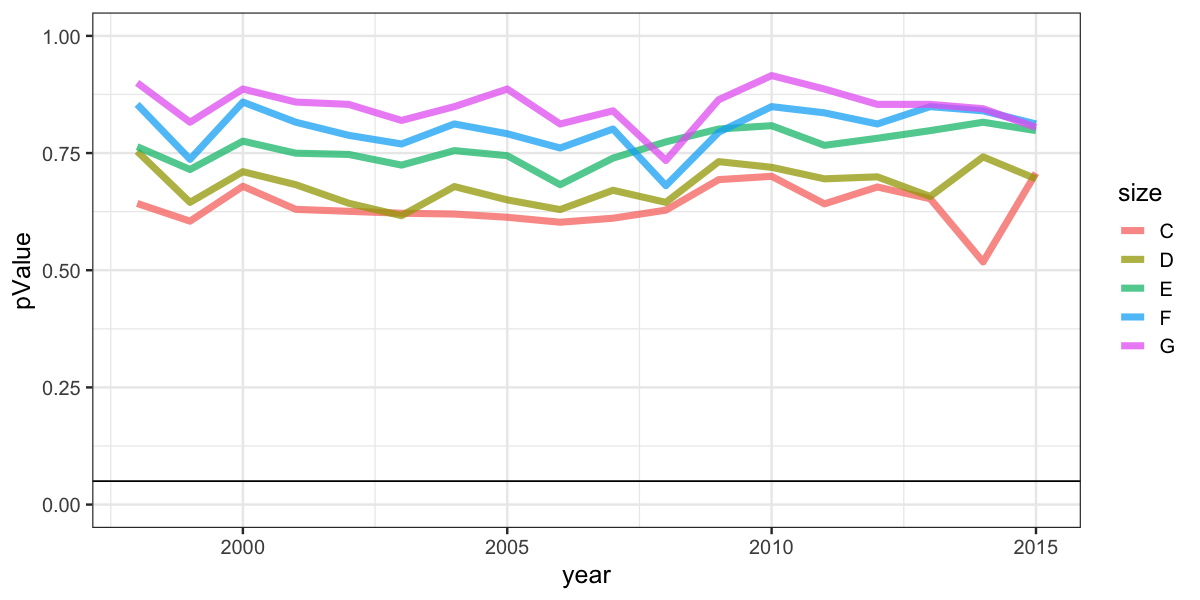

In [4]:
fig(10,5)
popdens <- results %>% 
  tidyr::separate(variable, into = c('group', 'variable_name'), 
                  sep = '\\.', remove = F) %>% 
  dplyr::mutate(pValue = round(pValue, 4)) %>% 
  dplyr::filter(group == 'PopDensFeatures') %>% 
  dplyr::mutate(feature_year = gsub('gpw_v4_population_density_rev11_', '',
                                    gsub('_30_sec_population_density', '', variable_name))) %>%
  dplyr::filter(abs(year - as.numeric(feature_year)) < 3)

ggplot(popdens, aes(year, pValue, group = size, color = size)) +
  geom_hline(yintercept = .05) +
  geom_line(alpha = .75, size = 2) +
  theme_bw(base_size = 15) +
  ylim(0, 1)

## Static features
Topography (elevation, slope, aspect) and gHM (global human modification index)

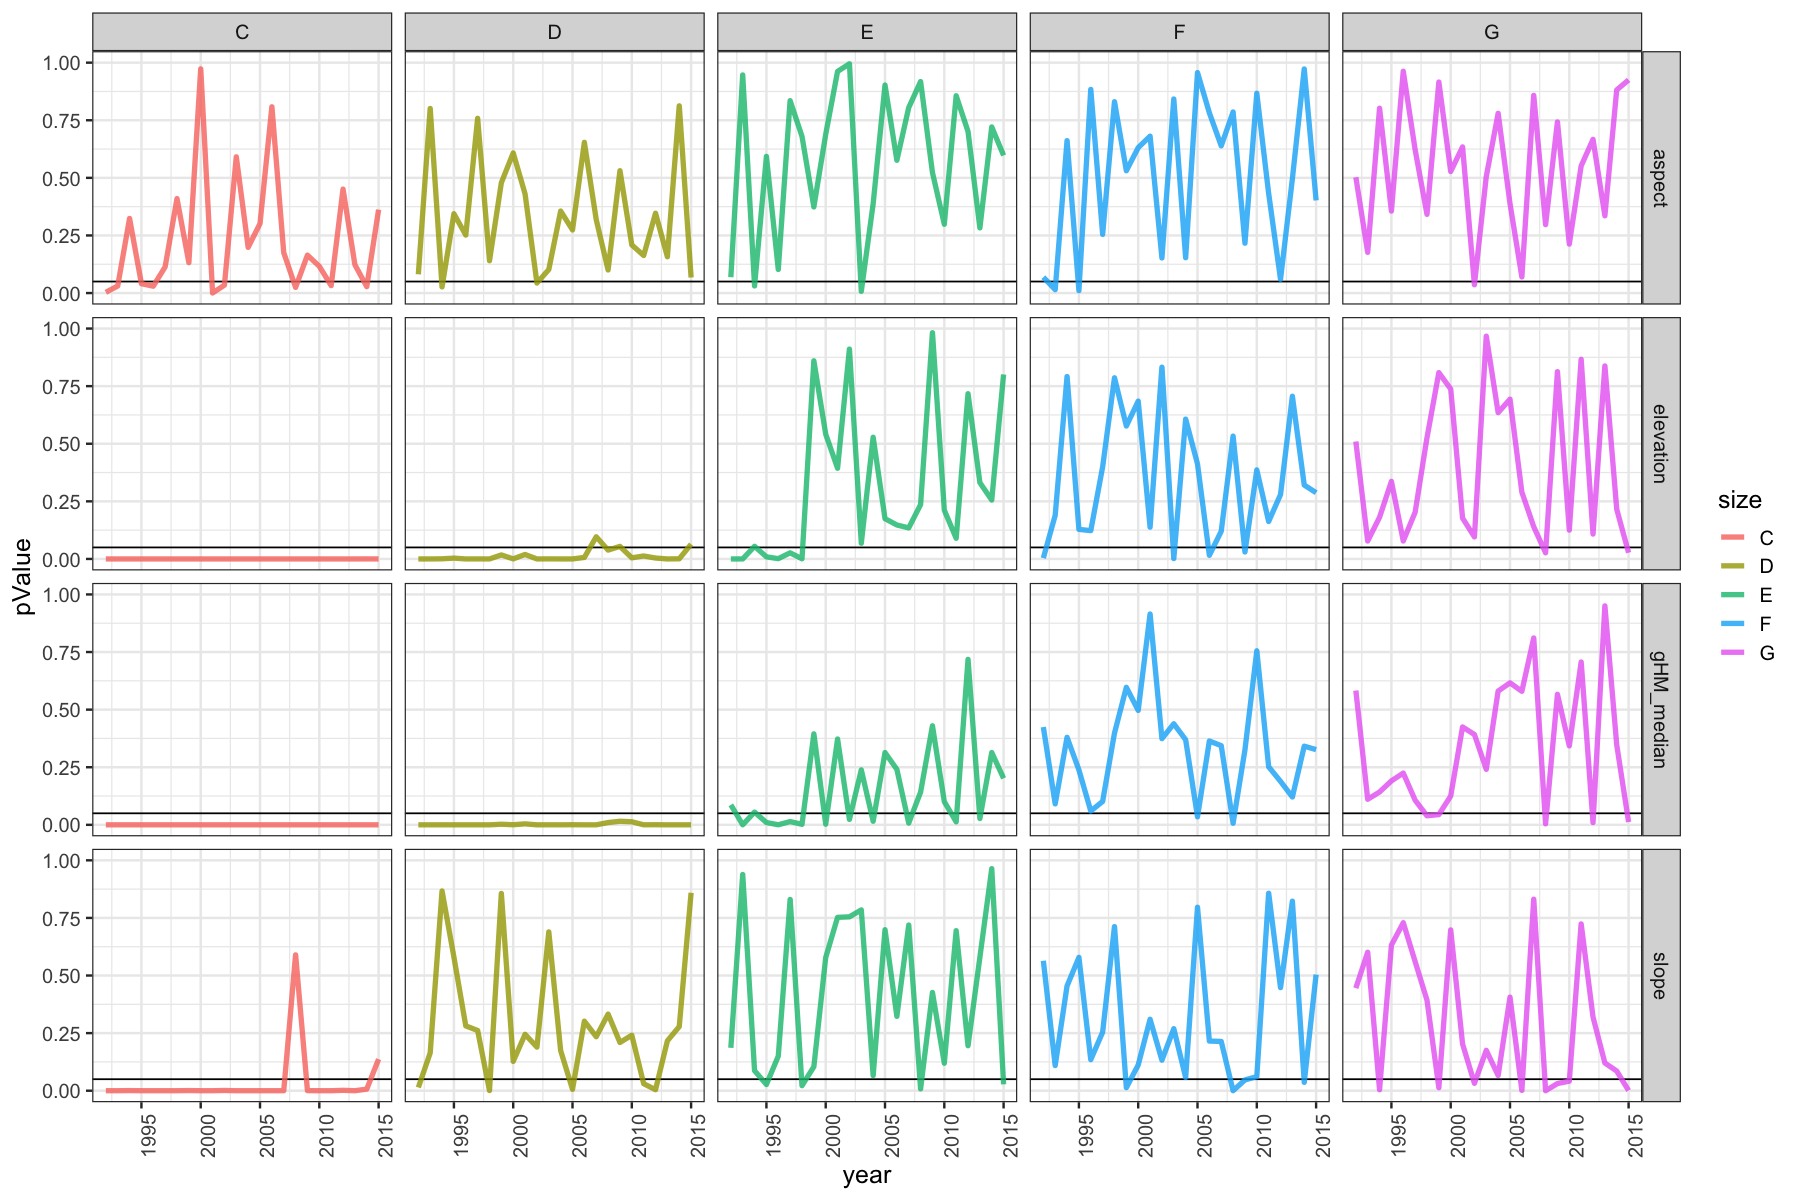

In [5]:
fig(15,10)
static <- results %>% 
  tidyr::separate(variable, into = c('group', 'variable_name'), 
                  sep = '\\.', remove = F) %>% 
  dplyr::mutate(pValue = round(pValue, 4)) %>% 
  dplyr::filter(group == 'Static') 
 
ggplot(static, aes(year, pValue, group = size, color = size)) +
  geom_hline(yintercept = .05) +
  geom_line(alpha = .8, size = 1.5) +
  theme_bw(base_size = 15) +
  ylim(0, 1) +
  facet_grid(variable_name ~ size) +
  theme(axis.text.x = element_text(angle = 90))

## LANDFIRE layers
#### Vegetation
"BPS" = Biophysical Settings: Vegetation that may have been dominant on the landscape preEuro‐ American settlement.  
"EVC" = Existing Vegetation Cover: Vertically projected percent cover ofthe live canopy layer for a specific
area.  
"EVH" = Existing Vegetation Height: Average height of the dominant vegetation       
"EVT" = Existing Vegetation Type: Complexes of plant communities  
"ESP" = Environmental Site Potential: represents the vegetation that could be supported at a given site based on the biophysical environment.  
#### Historical Fire Frequency and Severity
"FRG" = Fire Regime Groups: is intended to characterize presumed historical fire regimes within landscapes based on interactions between vegetation dynamics, fire spread, fire effects, and spatial context  
"MFRI" = Mean Fire Return Interval: quantifies the average period between fires under the presumed historical fire regime  
"PLS" = Percent Low-Severity Fire: image quantifies the amount of low-severity fires relative to mixed- and replacement-severity fires under the presumed historical fire regime and is defined as less than 25 percent average top-kill within a typical fire perimeter for a given vegetation type  
"PMS" = Percent of Mixed-Severity Fire: layer quantifies the amount of mixed-severity fires relative to low- and replacement-severity fires under the presumed historical fire regime, and is defined as between 25 and 75 percent average top-kill within a typical fire perimeter for a given vegetation type    
"PRS" = Percent of Replacement-severity Fire: layer quantifies the amount of replacement-severity fires relative to low- and mixed-severity fires under the presumed historical fire regime, and is defined as greater than 75 percent average top-kill within a typical fire perimeter for a given vegetation type  
#### Vegetation Departure
"SClass" = Succession Classes: layer characterizes current vegetation conditions with respect to the vegetation species composition, cover, and height ranges of successional states that occur within each biophysical setting  
"VCC" = Vegetation Condition Class: represents a simple categorization of the associated Vegetation Departure (VDEP) layer and indicates the general level to which current vegetation is different from the simulated historical vegetation reference conditions  
"VDep" = Vegetation Departure: indicates how different current vegetation on a landscape is from estimated historical conditions. VDep is based on changes to species composition, structural stage, and canopy closure.  

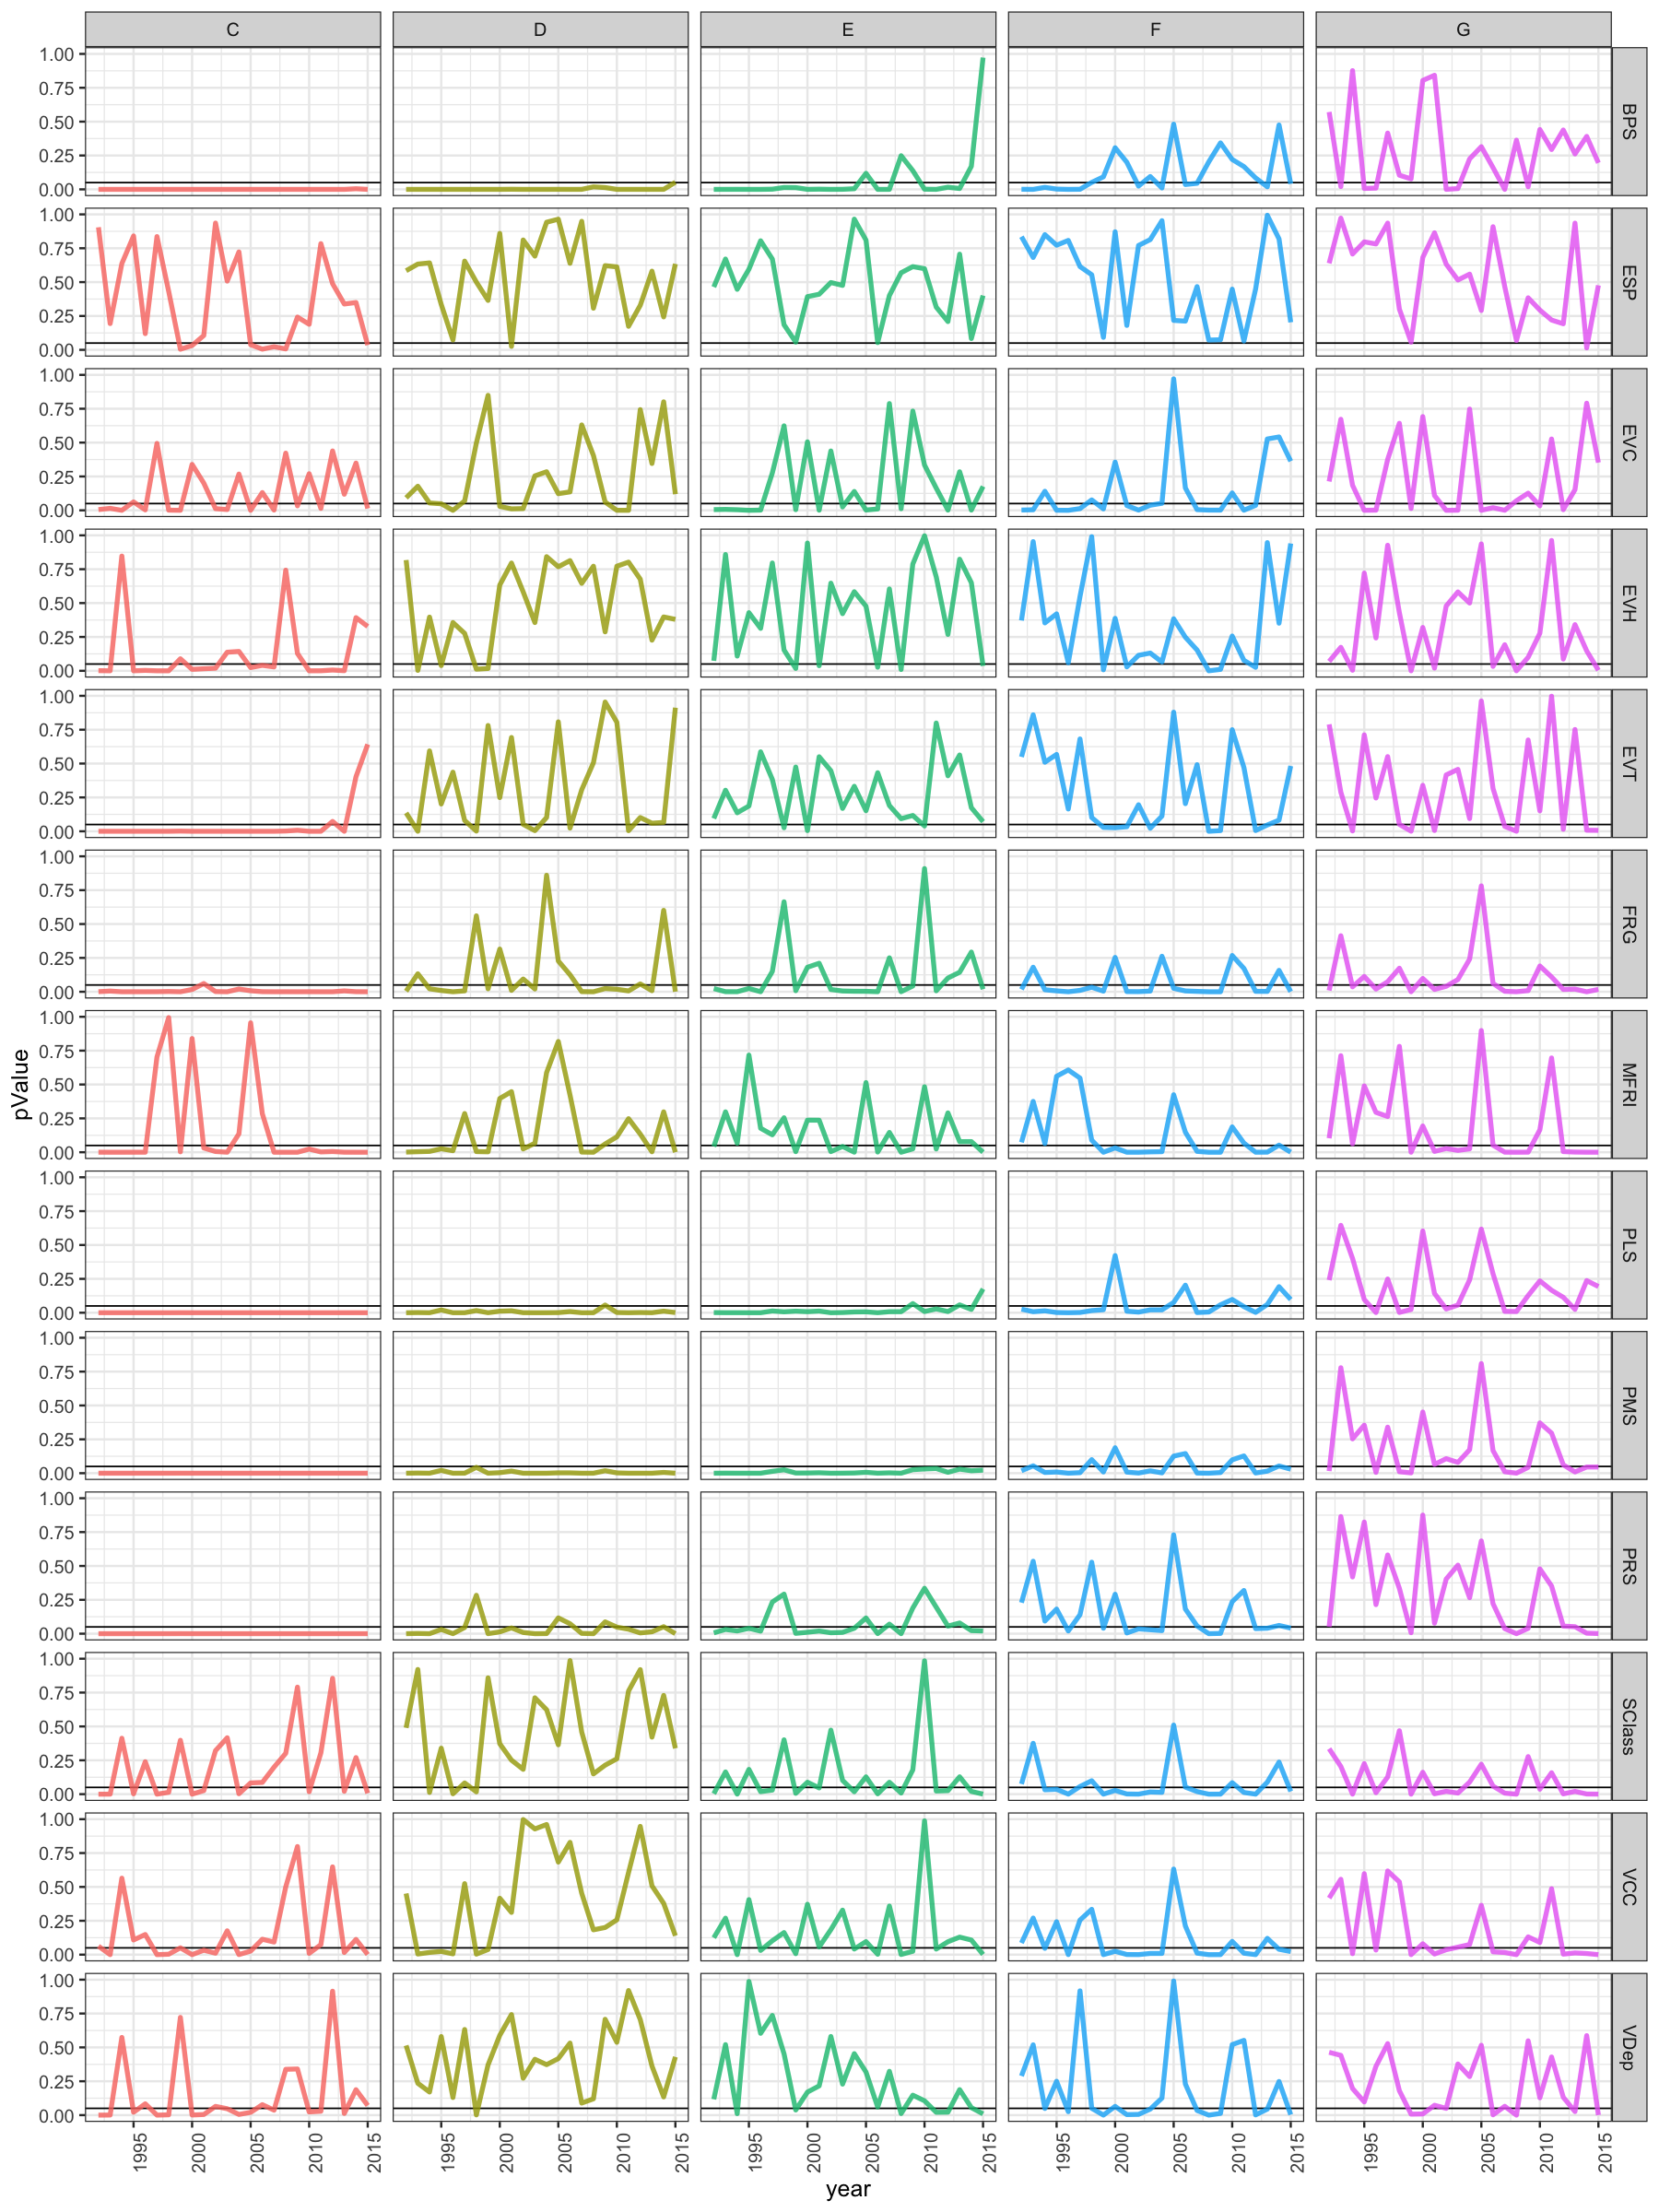

In [6]:
fig(15,20)
landfire <- results %>% 
  tidyr::separate(variable, into = c('group', 'variable_name'), 
                  sep = '\\.', remove = F) %>% 
  dplyr::mutate(pValue = round(pValue, 4)) %>% 
  dplyr::filter(group == 'LANDFIREFeatures') %>% 
  dplyr::mutate(variable_name = gsub('CONUS_', '', variable_name))

ggplot(landfire, aes(year, pValue, group = size, color = size)) +
  geom_hline(yintercept = .05) +
  geom_line(alpha = .8, size = 1.5) +
  theme_bw(base_size = 15) +
  ylim(0, 1) +
  facet_grid(variable_name ~ size) +
  theme(axis.text.x = element_text(angle = 90)) +
  guides(color = F)

## Monthly Precipitation

Focus on May-October since other months have few fires.

In [7]:
fire_counts <- fires %>%
  dplyr::filter(!(FIRE_SIZE_CLASS %in% c('A','B'))) %>%
  dplyr::mutate(date = as.Date(DISCOVERY_DOY, origin = paste0(FIRE_YEAR, '-01-01')),
                month = format(date, '%m')) %>%
  dplyr::group_by(FIRE_YEAR, month) %>%
  dplyr::summarize(N = n())  

`summarise()` regrouping output by 'FIRE_YEAR' (override with `.groups` argument)



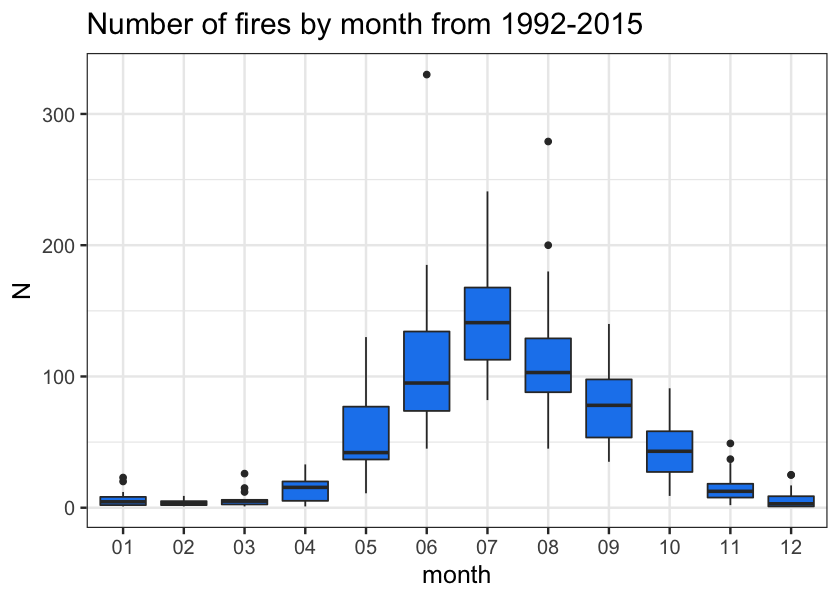

In [8]:
fig(7,5)
ggplot(fire_counts, aes(month, N)) + 
  geom_boxplot(fill = 'dodgerblue2') +
  theme_bw(base_size = 15) +
  labs(title = 'Number of fires by month from 1992-2015')

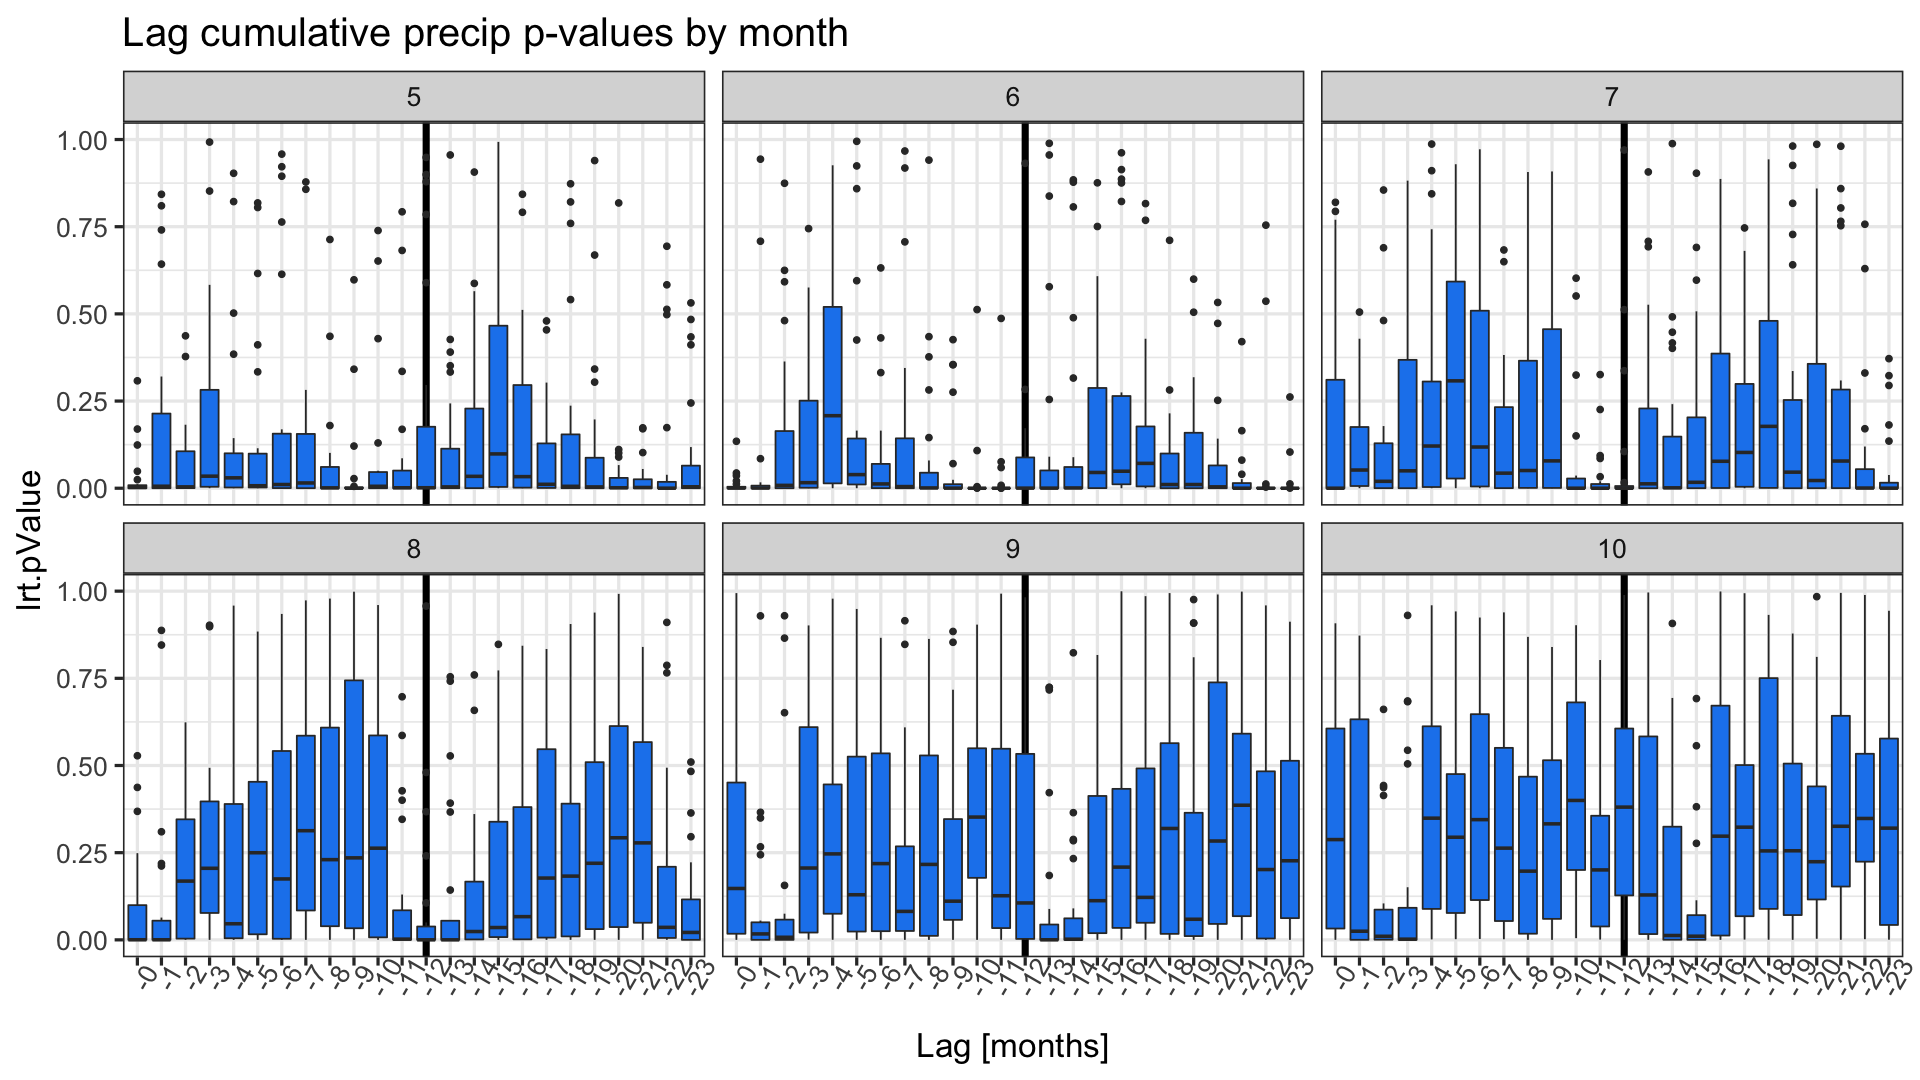

In [9]:
fig(16,9)
ggplot(pr.results %>% dplyr::filter(month >= 5, month <= 10)) +
  geom_vline(aes(xintercept = factor(12)), size = 2) +
  geom_boxplot(aes(factor(lag), lrt.pValue), fill = 'dodgerblue2') +
  facet_wrap(~month, ncol = 3, nrow = 4) +
  theme_bw(base_size = 20) +
  labs(x = 'Lag [months]', title = 'Lag cumulative precip p-values by month') +
  theme(axis.text.x = element_text(angle = 60)) +
  scale_x_discrete(labels = paste0('-', unique(pr.results$lag)))

In [15]:
pr.mean <- pr.results %>% 
  dplyr::group_by(lag, month) %>%
  dplyr::summarize(mean.pValue = mean(lrt.pValue),
                   median.pValue = median(lrt.pValue))

`summarise()` regrouping output by 'lag' (override with `.groups` argument)



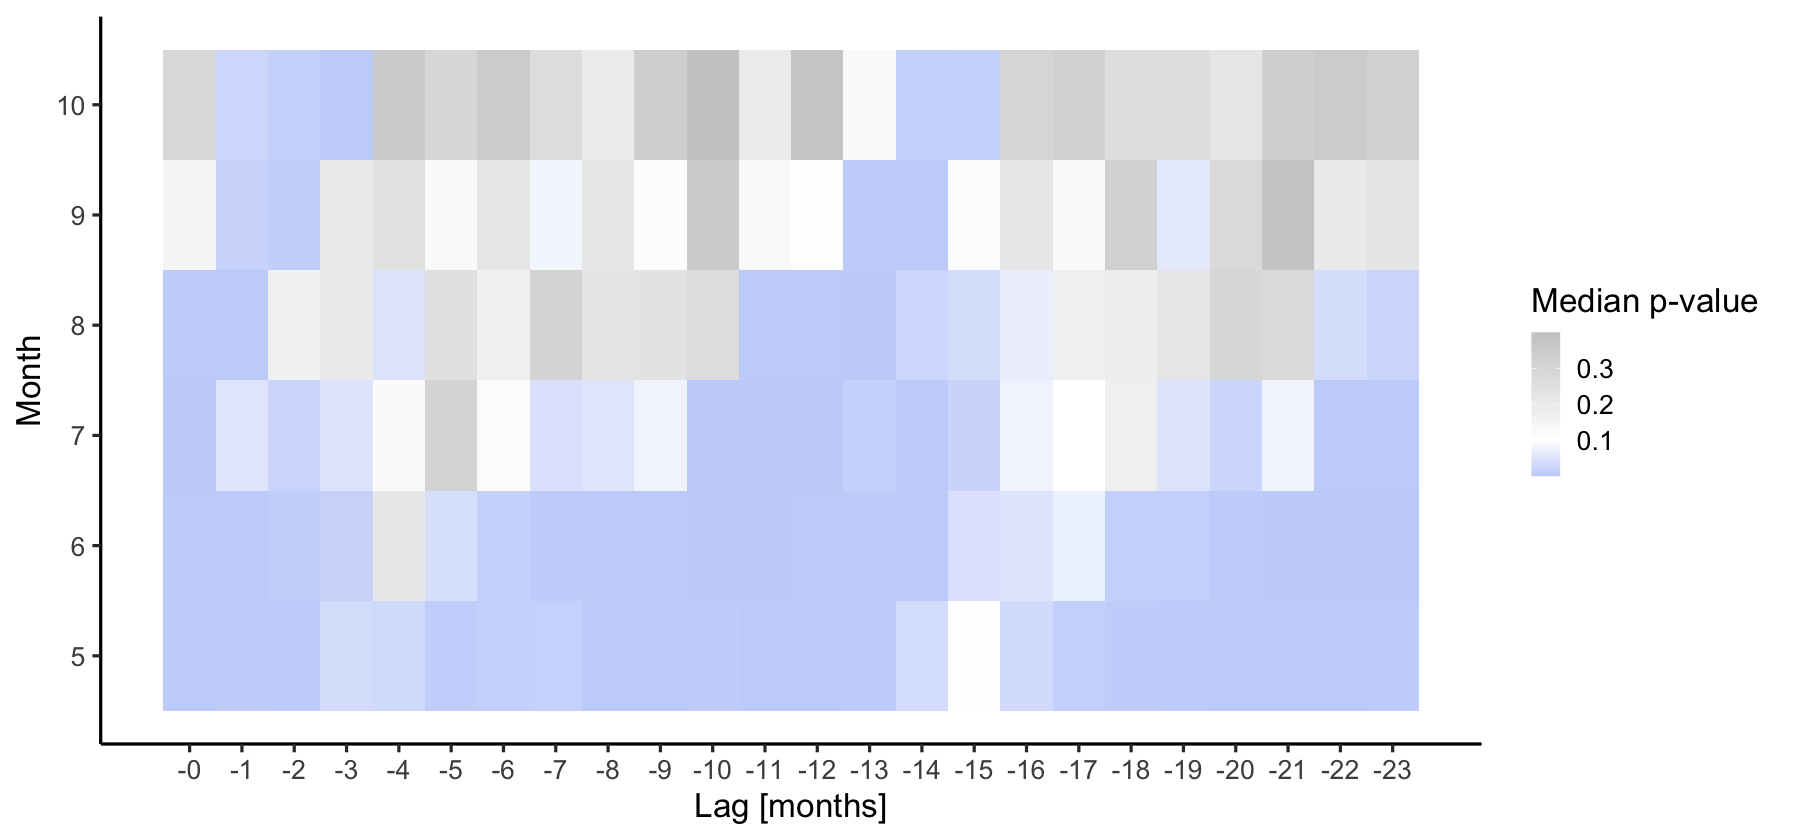

In [16]:
fig(15,7)
ggplot(pr.mean %>% dplyr::filter(month >= 5, month <= 10), aes(lag, month, fill = median.pValue)) +
  geom_tile() +
  theme_classic(base_size = 20) +
  scale_fill_gradient2(low = 'dodgerblue2', mid = "white", high = 'grey80', midpoint = .1) +
  labs(x = 'Lag [months]', y = 'Month', fill = 'Median p-value') +
  scale_x_continuous(breaks = unique(pr.mean$lag), labels = paste0('-', unique(pr.mean$lag))) +
  scale_y_continuous(breaks = unique(pr.mean$month))